# Group 4 - Avengers

## Exploratory Data Analysis on Restaurant Expenditure Analysis

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.chdir("C:\\Users\\satya\\Documents\\SEM 3 - SPRING 24\\CAPSTONE\EDA")
df =pd.read_excel('RES _ EDA FINAL MASTER DATA.xlsx')

In [3]:
df.head()

,NEWID,AGE_REF,SEX,FAM_SIZE,STATE CODE,STATE NAME,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Hours worked by spouse per week,Total Amount spent(outlays major),MARRIED,NEVER MARRIED,MARRIED WITH CHILDREN,DIVORCED,SEPERATED,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
0,5011064,87,Female,3,37.0,Oklahoma,1,57240.2,1979,10669.1001,2212.0,NaN,10806.10,0,0,1,0,0,931.0,0
1,5011134,73,Female,2,36.0,Ohio,0,55570.0,48970,11434.2500,1690.0,NaN,11434.25,1,0,0,0,0,0.0,0
2,5011244,47,Female,2,39.0,Pennsylvania,2,145387.0,172600,24199.7501,1300.0,50.0,28727.75,1,0,0,0,0,1140.0,0
3,5011314,82,Female,1,20.0,Maine,0,10082.0,7332,8025.0000,910.0,NaN,8025.00,0,0,1,0,0,780.0,0
4,5011334,87,Male,2,8.0,Delaware,0,50481.0,43807,9367.0000,1196.0,NaN,88685.00,1,0,0,0,0,650.0,0


### Total Entries

In [4]:
total_entries = len(df)
print("Total number of rows in the dataset",total_entries)

Total number of rows in the dataset 4807


# 1. Duplicates

In [5]:
duplicates = df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4802    False
4803    False
4804    False
4805    False
4806    False
Length: 4807, dtype: bool

In [6]:
print("Total Number Duplicates in the dataset ",duplicates.sum())

Total Number Duplicates in the dataset  0


# 2. Missing Values

In [7]:
missing_values = df.isnull().sum()
print("Missing values in the dataset")
missing_values

Missing values in the dataset


NEWID                                               0
AGE_REF                                             0
SEX                                                 0
FAM_SIZE                                            0
STATE CODE                                        392
STATE NAME                                        631
No of Income Earners                                0
Family Income after Taxes                           0
Family Income Before Taxes                          0
Expenditures this quarter                           0
Food at home this quarter                           0
Hours worked by spouse per week                  3280
Total Amount spent(outlays major)                   0
MARRIED                                             0
NEVER MARRIED                                       0
MARRIED WITH CHILDREN                               0
DIVORCED                                            0
SEPERATED                                           0
Food Away From Last Quarter 

### Count of Missing values in the columns

In [8]:
# Creating a DataFrame from the missing values count
missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])

# Filtering out columns with no missing values for clarity
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

# Display the DataFrame
print(missing_values_df)

# This DataFrame 'missing_values_df' now contains the count of missing (NaN) values for each column that has missing values.



                                 Missing Values
STATE CODE                                  392
STATE NAME                                  631
Hours worked by spouse per week            3280


### Percentage of missing values in the columns

In [9]:

# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values / total_entries) * 100

# Create a DataFrame to display column names and their corresponding percentage of missing values
missing_percentage_df = pd.DataFrame({'Column Name': missing_values_percentage.index, 'Percentage Missing (%)': missing_values_percentage.values})

# Display the DataFrame
print(missing_percentage_df)


                                      Column Name  Percentage Missing (%)
0                                           NEWID                0.000000
1                                         AGE_REF                0.000000
2                                             SEX                0.000000
3                                        FAM_SIZE                0.000000
4                                      STATE CODE                8.154774
5                                      STATE NAME               13.126690
6                            No of Income Earners                0.000000
7                       Family Income after Taxes                0.000000
8                      Family Income Before Taxes                0.000000
9                     Expenditures this quarter                  0.000000
10                      Food at home this quarter                0.000000
11                Hours worked by spouse per week               68.233826
12              Total Amount spent(out

### Visual representation of missing values in heat map

<AxesSubplot:>

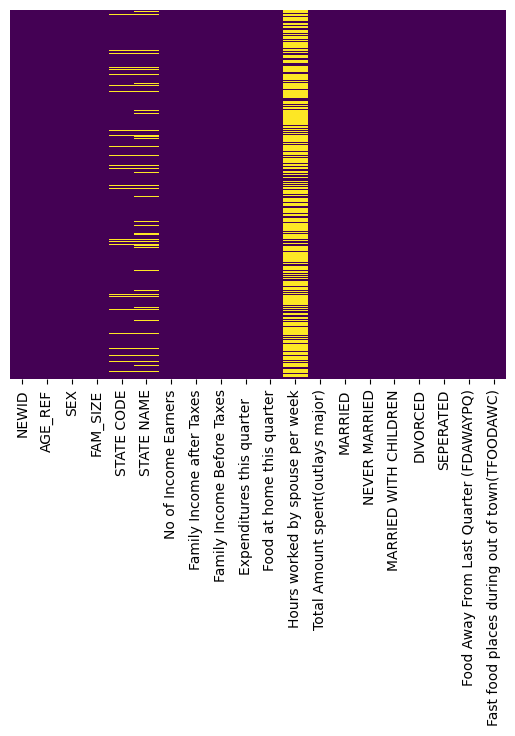

In [10]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

# 3. Data Quality Report 

In [11]:
df.dtypes

NEWID                                              int64
AGE_REF                                            int64
SEX                                               object
FAM_SIZE                                           int64
STATE CODE                                       float64
STATE NAME                                        object
No of Income Earners                               int64
Family Income after Taxes                        float64
Family Income Before Taxes                         int64
Expenditures this quarter                        float64
Food at home this quarter                        float64
Hours worked by spouse per week                  float64
Total Amount spent(outlays major)                float64
MARRIED                                            int64
NEVER MARRIED                                      int64
MARRIED WITH CHILDREN                              int64
DIVORCED                                           int64
SEPERATED                      

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   NEWID                                          4807 non-null   int64  
 1   AGE_REF                                        4807 non-null   int64  
 2   SEX                                            4807 non-null   object 
 3   FAM_SIZE                                       4807 non-null   int64  
 4   STATE CODE                                     4415 non-null   float64
 5   STATE NAME                                     4176 non-null   object 
 6   No of Income Earners                           4807 non-null   int64  
 7   Family Income after Taxes                      4807 non-null   float64
 8   Family Income Before Taxes                     4807 non-null   int64  
 9   Expenditures this quarter                      4807 

### Descriptive Statistics of the dataset 

In [13]:
# Prepare for further analysis by checking basic statistics to identify potential outliers
Descriptive_stats = df.describe()
Descriptive_stats

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Hours worked by spouse per week,Total Amount spent(outlays major),MARRIED,NEVER MARRIED,MARRIED WITH CHILDREN,DIVORCED,SEPERATED,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
count,4.807000e+03,4807.000000,4807.000000,4415.000000,4807.000000,4807.000000,4.807000e+03,4807.000000,4807.000000,1527.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000,4807.000000
mean,5.165009e+06,53.899105,2.340961,26.574179,1.250468,88550.920221,8.721371e+04,12634.875408,1248.822897,39.984283,12803.835669,0.499688,0.221344,0.101727,0.153110,0.021011,611.411206,32.716039
std,9.341853e+04,17.805756,1.447382,16.391171,1.002331,76918.876437,9.918324e+04,14060.896296,1024.386861,11.852623,13623.535875,0.500052,0.415195,0.302320,0.360131,0.143436,1023.353539,179.054660
min,5.011064e+06,16.000000,1.000000,1.000000,0.000000,-331819.400000,-5.806200e+04,20.000000,0.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.095433e+06,39.000000,1.000000,12.000000,0.000000,36277.200000,2.416450e+04,4944.575050,541.666700,40.000000,5155.958500,0.000000,0.000000,0.000000,0.000000,0.000000,94.333300,0.000000
50%,5.207302e+06,55.000000,2.000000,26.000000,1.000000,67902.000000,5.770000e+04,8961.000000,975.000000,40.000000,9362.427000,0.000000,0.000000,0.000000,0.000000,0.000000,346.666700,0.000000
75%,5.254916e+06,68.000000,3.000000,40.000000,2.000000,117893.500000,1.170000e+05,15491.958300,1642.000000,45.000000,16247.900000,1.000000,0.000000,0.000000,0.000000,0.000000,780.000000,0.000000
max,5.286191e+06,87.000000,13.000000,55.000000,8.000000,683154.600000,1.189674e+06,357008.188100,11349.000000,99.000000,362342.188000,1.000000,1.000000,1.000000,1.000000,1.000000,32910.000000,5514.000000


# 4. Outliers

In [14]:
# Function to find outliers using IQR method
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers.tolist()

# Find outliers for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers = {}
for column in numerical_columns:
    column_outliers = find_outliers(column)
    if column_outliers:
        outliers[column] = column_outliers

# Print outliers found in numerical columns
for column, values in outliers.items():
    print(f"Outliers in column '{column}': {values}")

Outliers in column 'FAM_SIZE': [7, 7, 8, 8, 8, 7, 7, 8, 7, 7, 10, 7, 7, 7, 8, 7, 8, 8, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 8, 9, 13, 7, 8, 8, 7, 7, 10, 7, 7, 7, 10, 8, 8, 8, 7, 10, 7, 7, 8, 11, 8, 7, 7, 7, 7, 11, 10, 9, 7, 7, 7, 7, 7, 7, 8, 10, 7, 8, 7]
Outliers in column 'No of Income Earners': [6, 8]
Outliers in column 'Family Income after Taxes': [349718.3, 427821.8, 282590.8, 303086.9, 278341.5, 294364.9, 253181.0, 244593.0, 241242.8, 252362.4, -331819.4, 329335.9, 379319.9, 372743.9, 275213.9, 310035.9, 533950.6, 326910.5, -267187.0, 259542.0, 338495.9, 271784.9, 368006.7, 328177.9, 257894.0, 293132.8, 256351.8, 324127.8, 262897.4, 344503.9, 271714.9, 262606.0, 615271.4, 305363.9, 301967.0, 379269.9, 434186.8, 274098.9, 245815.9, 321263.9, 253940.1, 262401.9, 245348.9, 247062.3, 296620.9, 347300.1, 251642.9, 243669.0, 275641.5, 334825.9, 250553.9, 293886.5, 414063.4, 325123.6, 365150.0, 302098.7, 454894.7, 276604.9, 273455.8, 271734.1, 269288.9, 330651.5, 247827.7, 242599.9, 444647.8

### Percentage of outliers in each column

In [15]:
# Function to find outliers using IQR method and calculate percentage
def find_outliers_and_percentage(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    percentage = round(len(outliers) / len(df) * 100,2)
    return outliers.tolist(), percentage


# Find outliers and percentage for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
outliers_percentage = {}
for column in numerical_columns:
    column_outliers, percentage = find_outliers_and_percentage(column)
    if column_outliers:
        outliers_percentage[column] = (column_outliers, percentage)


print("Percentage of outliers in each variable")
print("\n")
# Print outliers and percentage found in numerical columns
for column, (values, percentage) in outliers_percentage.items():
    print(f"{column} {percentage}%")

Percentage of outliers in each variable


FAM_SIZE 1.46%
No of Income Earners 0.04%
Family Income after Taxes 5.45%
Family Income Before Taxes 5.37%
Expenditures this quarter   6.76%
Food at home this quarter 4.64%
Hours worked by spouse per week 9.05%
Total Amount spent(outlays major) 5.51%
NEVER MARRIED 22.13%
MARRIED WITH CHILDREN 10.17%
DIVORCED 15.31%
SEPERATED 2.1%
Food Away From Last Quarter (FDAWAYPQ) 6.51%
Fast food places during out of town(TFOODAWC) 9.61%


### Counting total number of outliers for dependent variables and for important independent variables

In [16]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Counting total number of  outliers for different variable in the dataset
outliers_family_income_after_taxes = detect_outliers('Family Income after Taxes').count()
outliers_expenditures_this_quarter = detect_outliers('Expenditures this quarter  ').count()
outliers_food_away_last_quarter = detect_outliers('Food Away From Last Quarter (FDAWAYPQ)').count()
outliers_food_places_outoftown = detect_outliers('Fast food places during out of town(TFOODAWC)').count()

# Summary of outliers
outliers_summary = {
    'Family Income after Taxes Outliers': outliers_family_income_after_taxes,
    'Expenditures this quarter Outliers': outliers_expenditures_this_quarter,
    'Food Away Last Quarter Outliers': outliers_food_away_last_quarter,
    'Fast food places during out of town(TFOODAWC)': outliers_food_places_outoftown
}

outliers_summary


{'Family Income after Taxes Outliers': 262,
 'Expenditures this quarter Outliers': 325,
 'Food Away Last Quarter Outliers': 313,
 'Fast food places during out of town(TFOODAWC)': 462}

## Box Plots

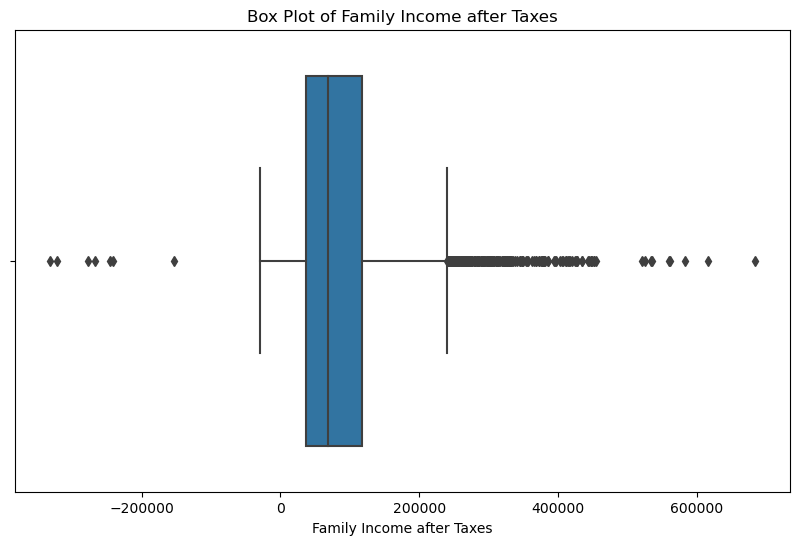

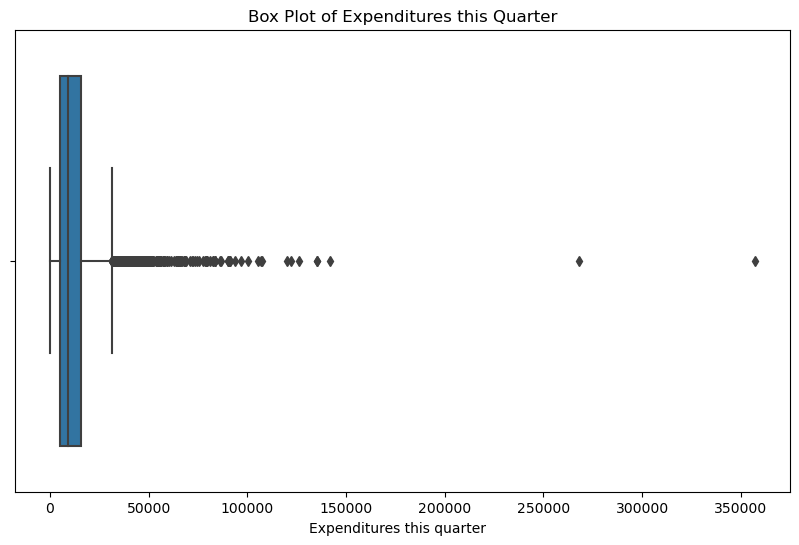

In [17]:
# Box plot for 'Family Income after Taxes'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Family Income after Taxes'])
plt.title('Box Plot of Family Income after Taxes')
plt.show()

# Box plot for 'Expenditures this quarter'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Expenditures this quarter  '])
plt.title('Box Plot of Expenditures this Quarter')
plt.show()



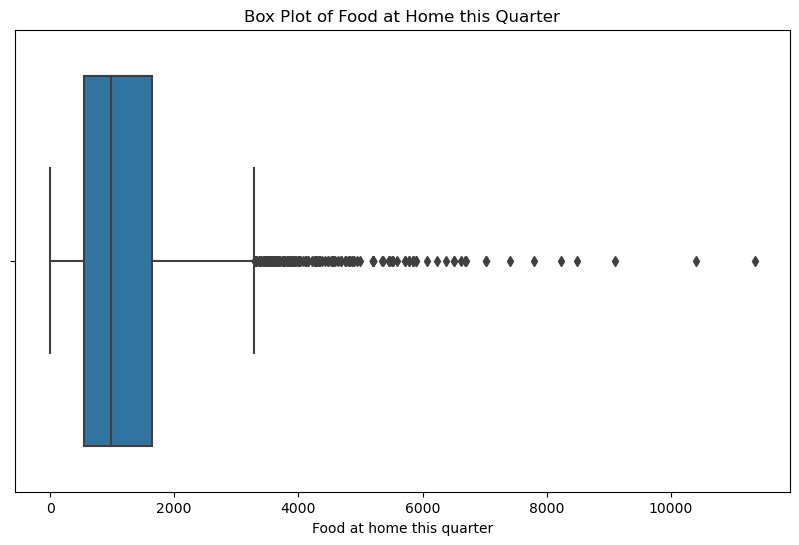

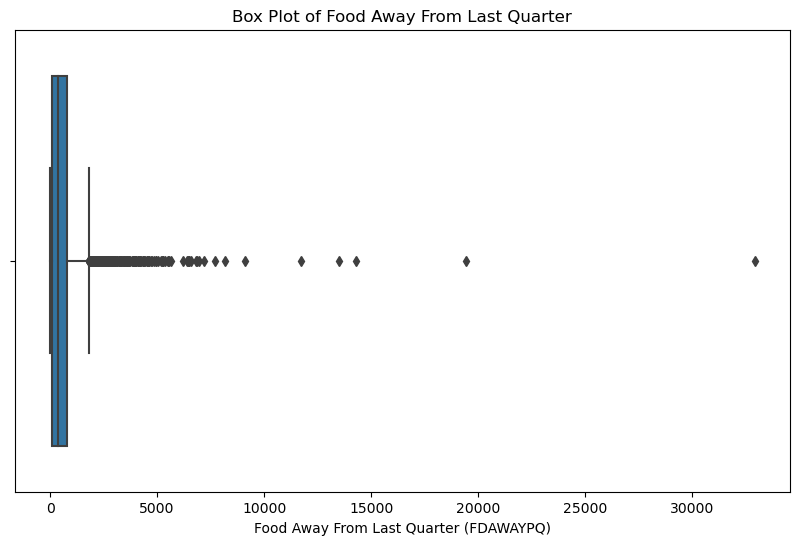

In [18]:
# Box plot for 'Food at home this quarter'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Food at home this quarter'])
plt.title('Box Plot of Food at Home this Quarter')
plt.show()


# Box plot for 'Food Away From Last Quarter (FDAWAYPQ)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Food Away From Last Quarter (FDAWAYPQ)'])
plt.title('Box Plot of Food Away From Last Quarter')
plt.show()




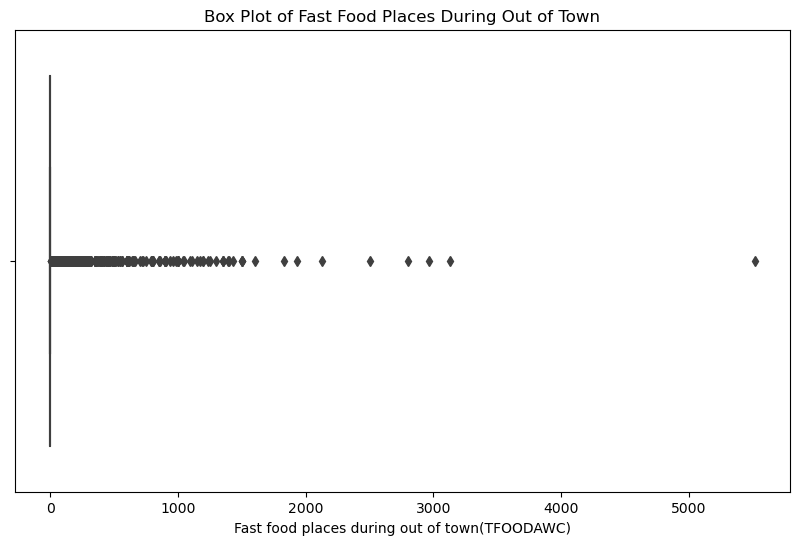

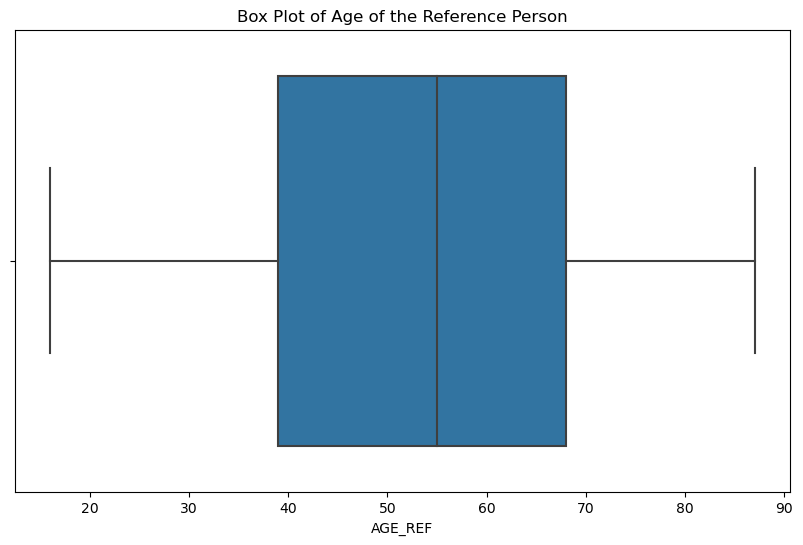

In [19]:
# Box plot for 'Fast food places during out of town(TFOODAWC)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fast food places during out of town(TFOODAWC)'])
plt.title('Box Plot of Fast Food Places During Out of Town')
plt.show()


# Box plot for 'AGE_REF'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AGE_REF'])
plt.title('Box Plot of Age of the Reference Person')
plt.show()



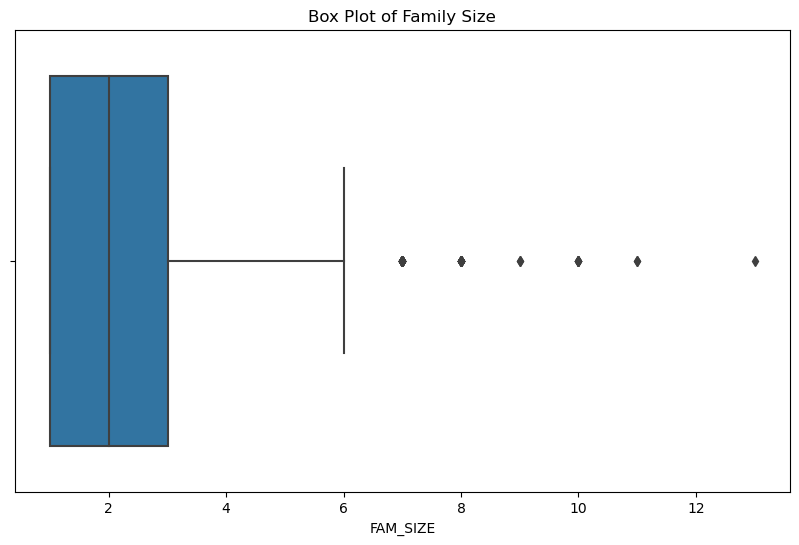

In [20]:
# Box plot for 'FAM_SIZE'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['FAM_SIZE'])
plt.title('Box Plot of Family Size')
plt.show()

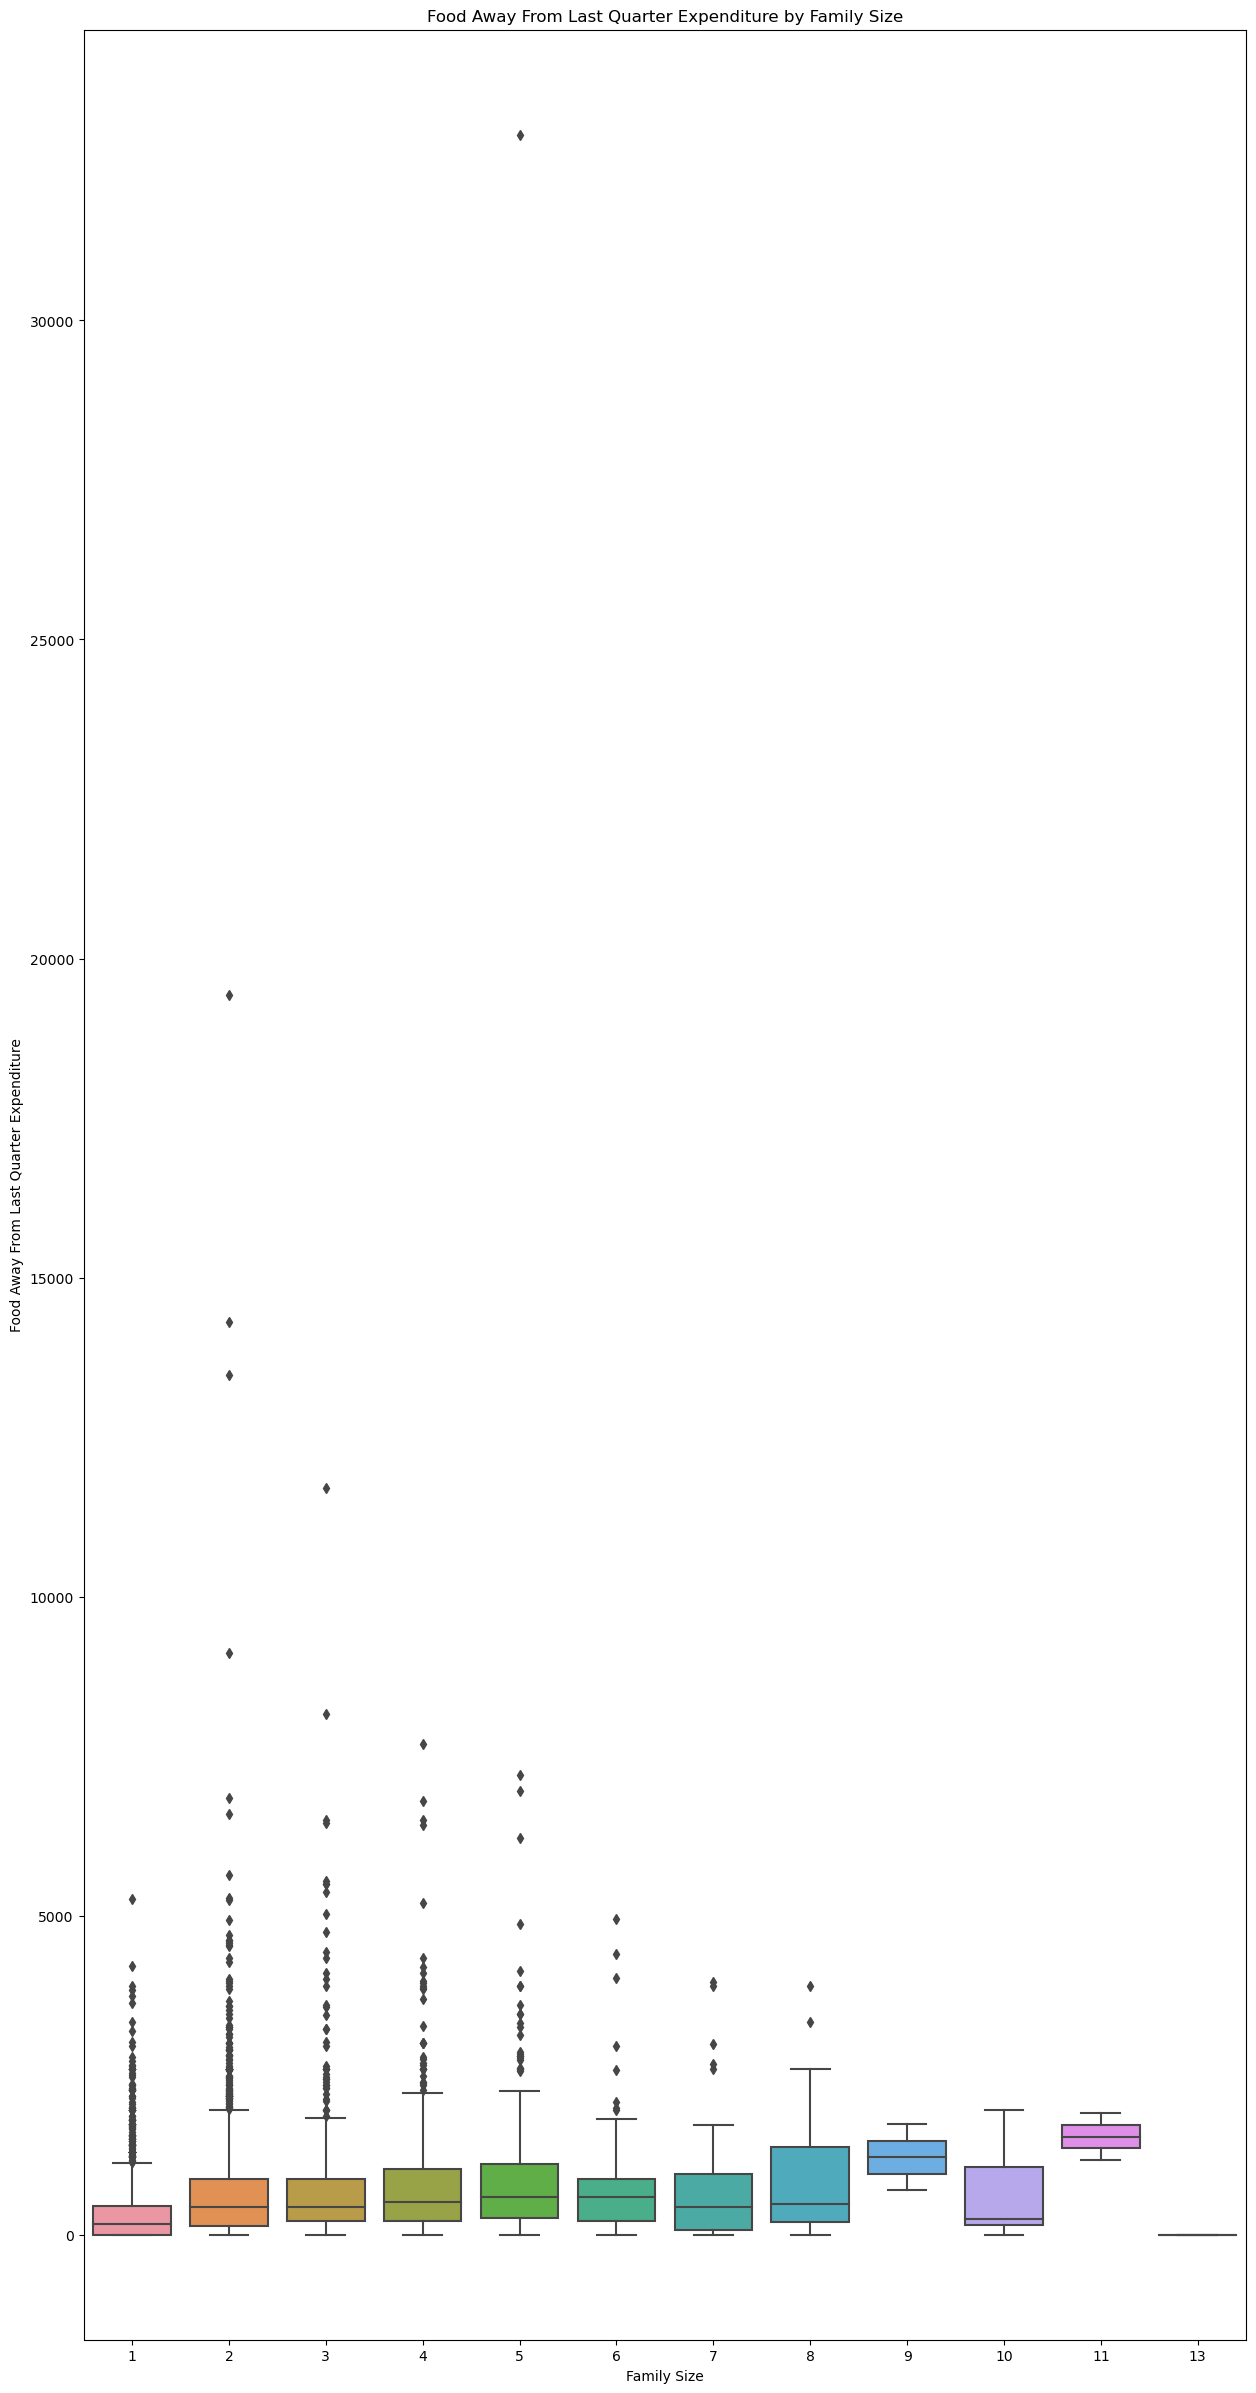

In [21]:
# Box plot for Food Away From Last Quarter (FDAWAYPQ) vs. Family Size
plt.figure(figsize=(15, 30))
sns.boxplot(x='FAM_SIZE', y='Food Away From Last Quarter (FDAWAYPQ)', data=df)
plt.title('Food Away From Last Quarter Expenditure by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Food Away From Last Quarter Expenditure')
plt.show()

# 5. Distribution of dependent variables and independent variables

## Distribution of dependent variables

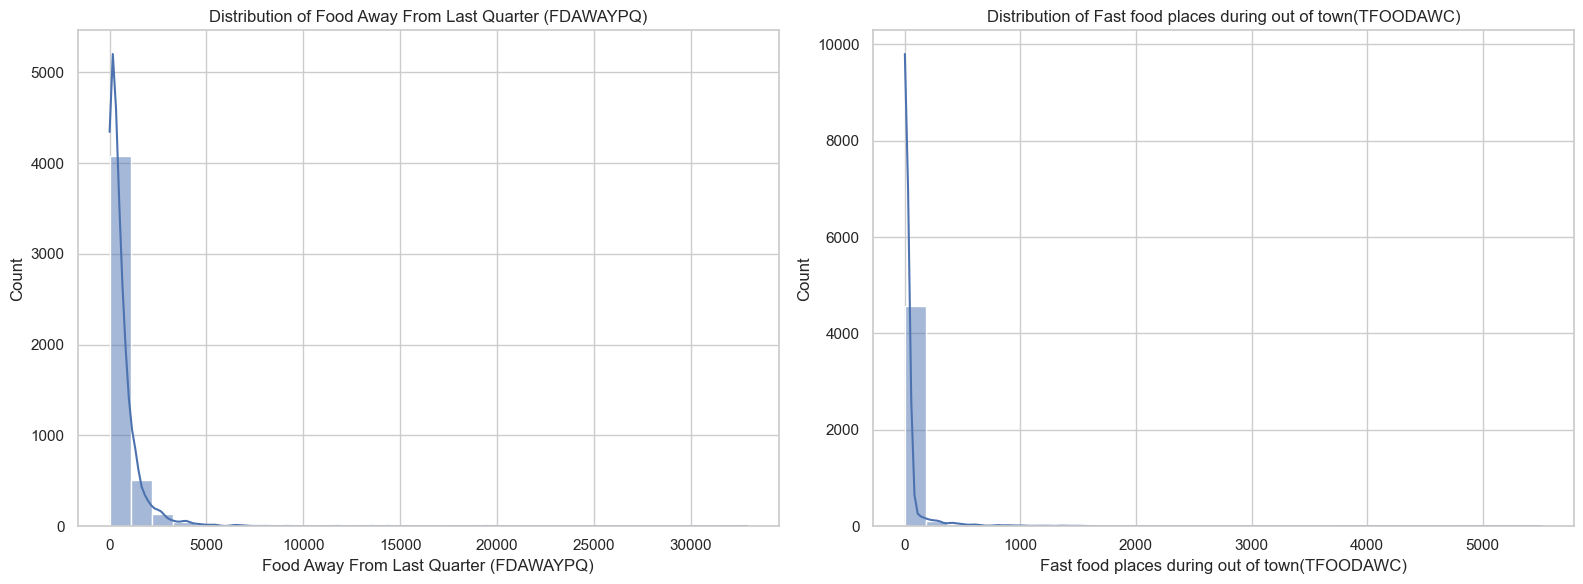

In [22]:

# Setting the style of the plots
sns.set(style="whitegrid")

# Creating a subplot grid for 2 histograms
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # Adjusted subplot dimensions

# Histogram for 'Food Away From Last Quarter (FDAWAYPQ)'
sns.histplot(df['Food Away From Last Quarter (FDAWAYPQ)'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Food Away From Last Quarter (FDAWAYPQ)')

# Histogram for 'Fast food places during out of town(TFOODAWC)'
sns.histplot(df['Fast food places during out of town(TFOODAWC)'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Fast food places during out of town(TFOODAWC)')

plt.tight_layout()
plt.show()


## Distributions of Key independent variables

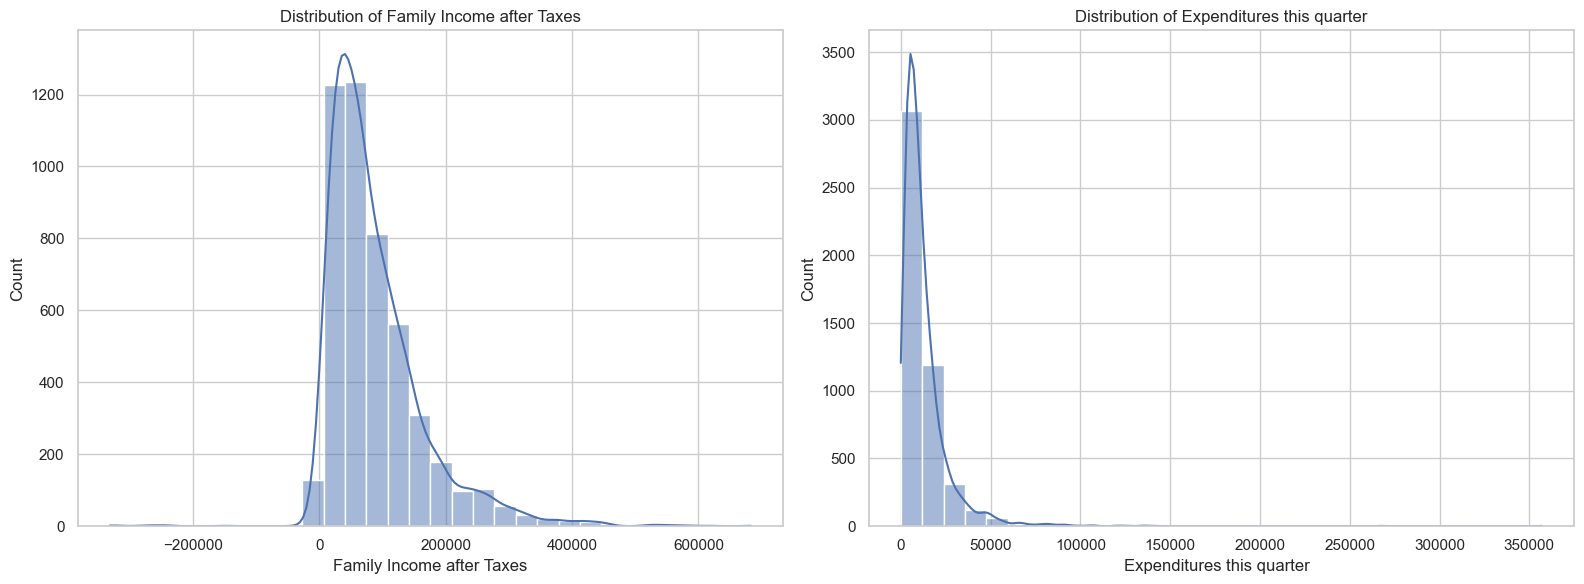

In [23]:
# Setting the style of the plots
sns.set(style="whitegrid")

# Distribution of Dependent Variables
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram for 'Family Income after Taxes'
sns.histplot(df['Family Income after Taxes'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Family Income after Taxes')

# Histogram for 'Expenditures this quarter'
sns.histplot(df['Expenditures this quarter  '], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Expenditures this quarter')

plt.tight_layout()
plt.show()


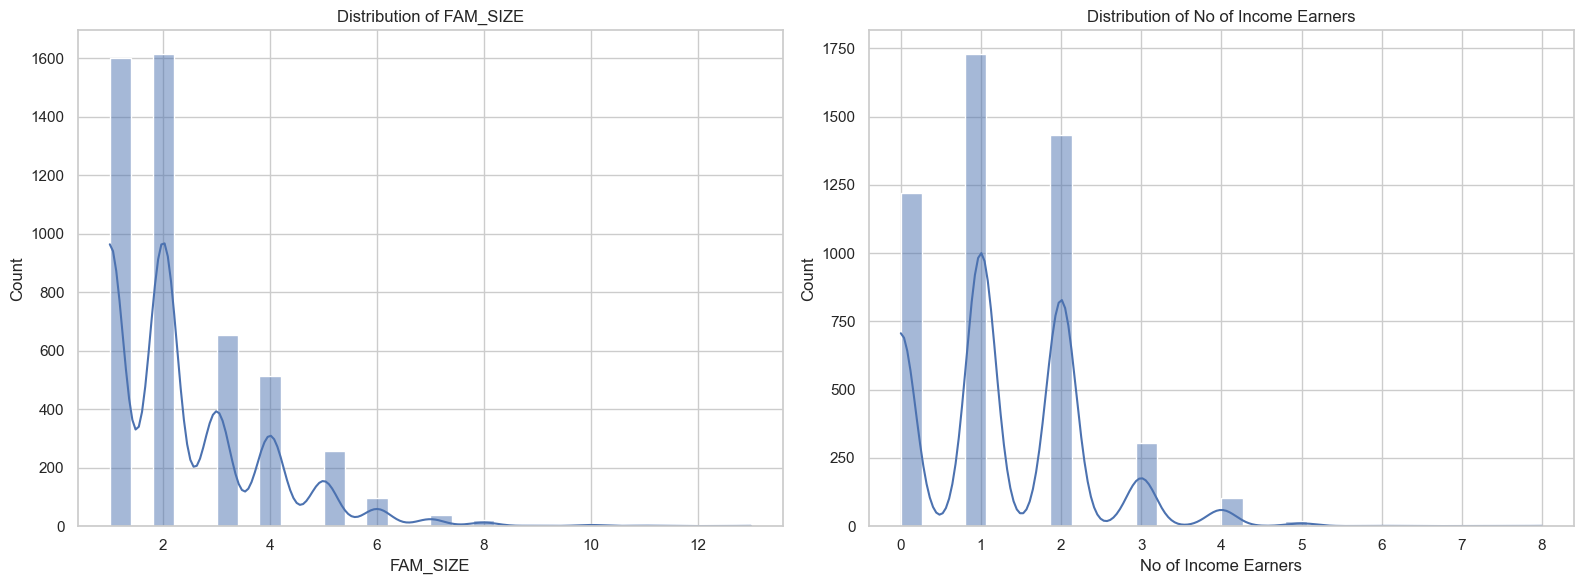

In [24]:
# Setting the style of the plots
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of Key Independent Variables
# Histogram for 'Family Income after Taxes'
sns.histplot(df['FAM_SIZE'], bins=30, ax=ax[0], kde=True)
ax[0].set_title('Distribution of FAM_SIZE')

# Histogram for 'Expenditures this quarter'
sns.histplot(df['No of Income Earners'], bins=30, ax=ax[1], kde=True)
ax[1].set_title('Distribution of No of Income Earners')

plt.tight_layout()
plt.show()

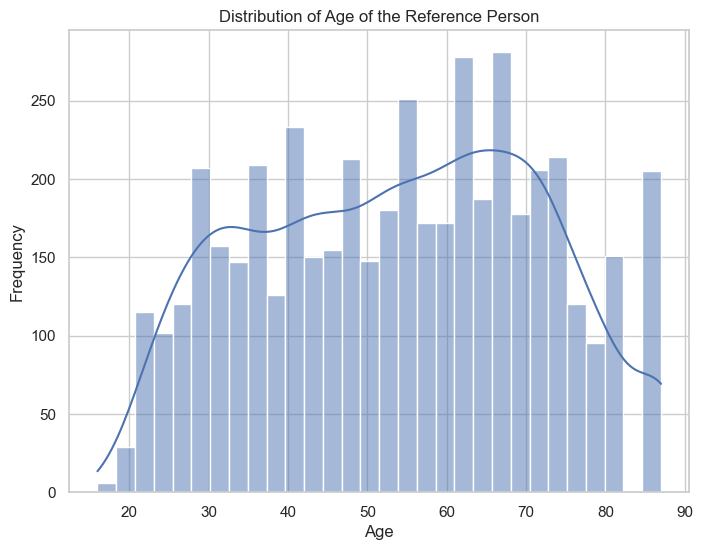

In [25]:
#Age of the Reference Person
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE_REF'], bins=30, kde=True)
plt.title('Distribution of Age of the Reference Person')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Distributions of Key variables in Bar charts 

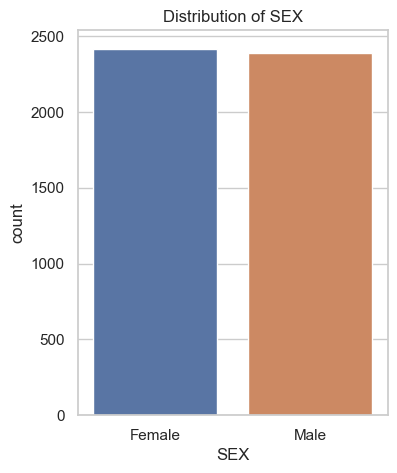

In [26]:

# Categorical Variables: Distribution with Bar Charts
# Example for 'SEX'
plt.figure(figsize=(4, 5))
sns.countplot(x=df['SEX'])
plt.title('Distribution of SEX')
plt.show()


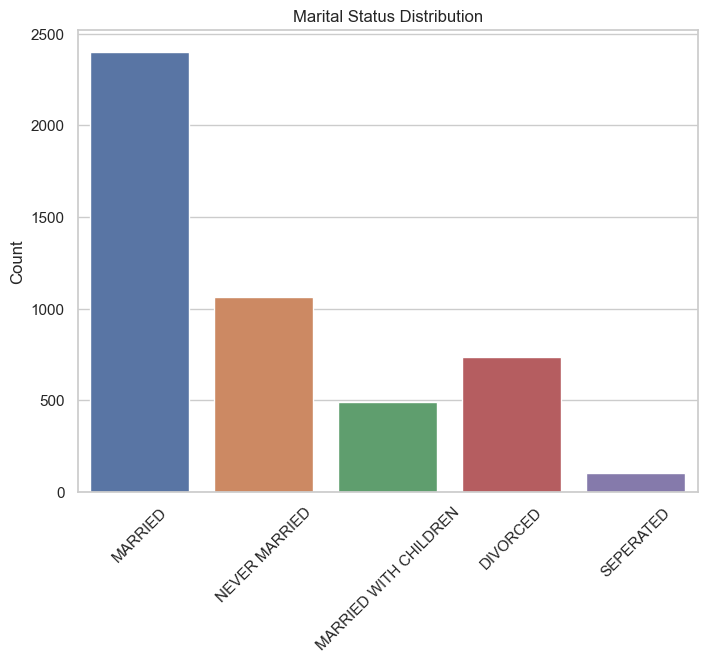

In [27]:
# marital status columns are binary indicators
marital_status_counts = df[['MARRIED', 'NEVER MARRIED', 'MARRIED WITH CHILDREN', 'DIVORCED', 'SEPERATED']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)
plt.title('Marital Status Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


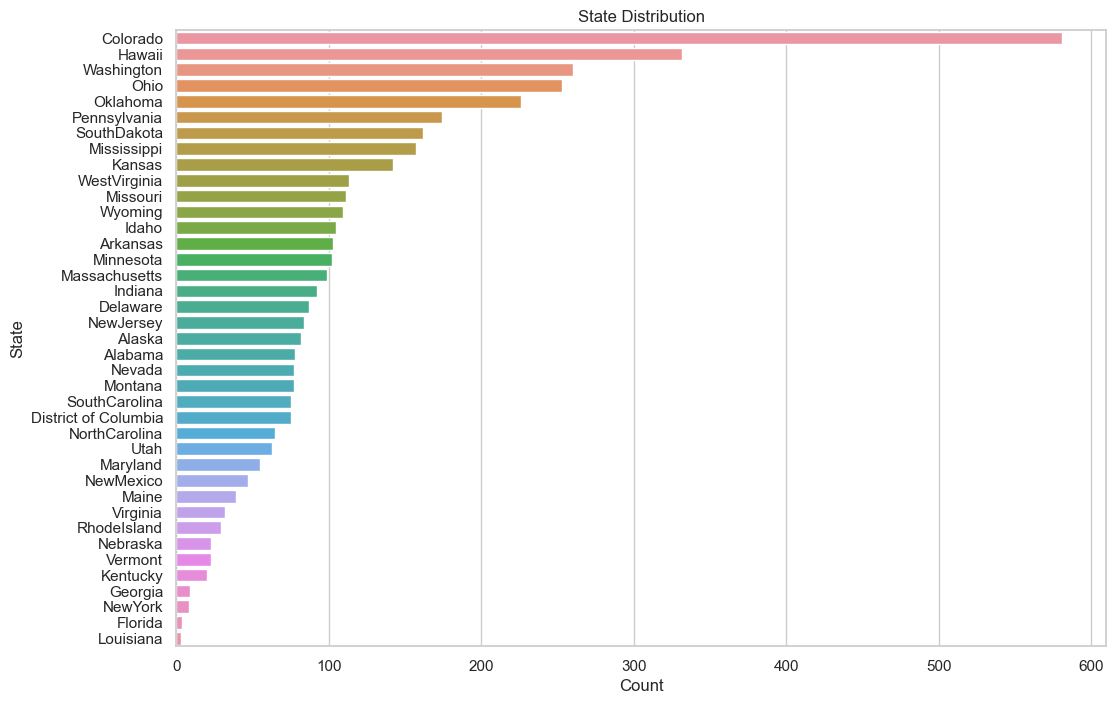

In [28]:
#State Distribution

plt.figure(figsize=(12, 8))
state_counts = df['STATE NAME'].value_counts()
sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('State Distribution')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


# 6. Bivariate Analysis

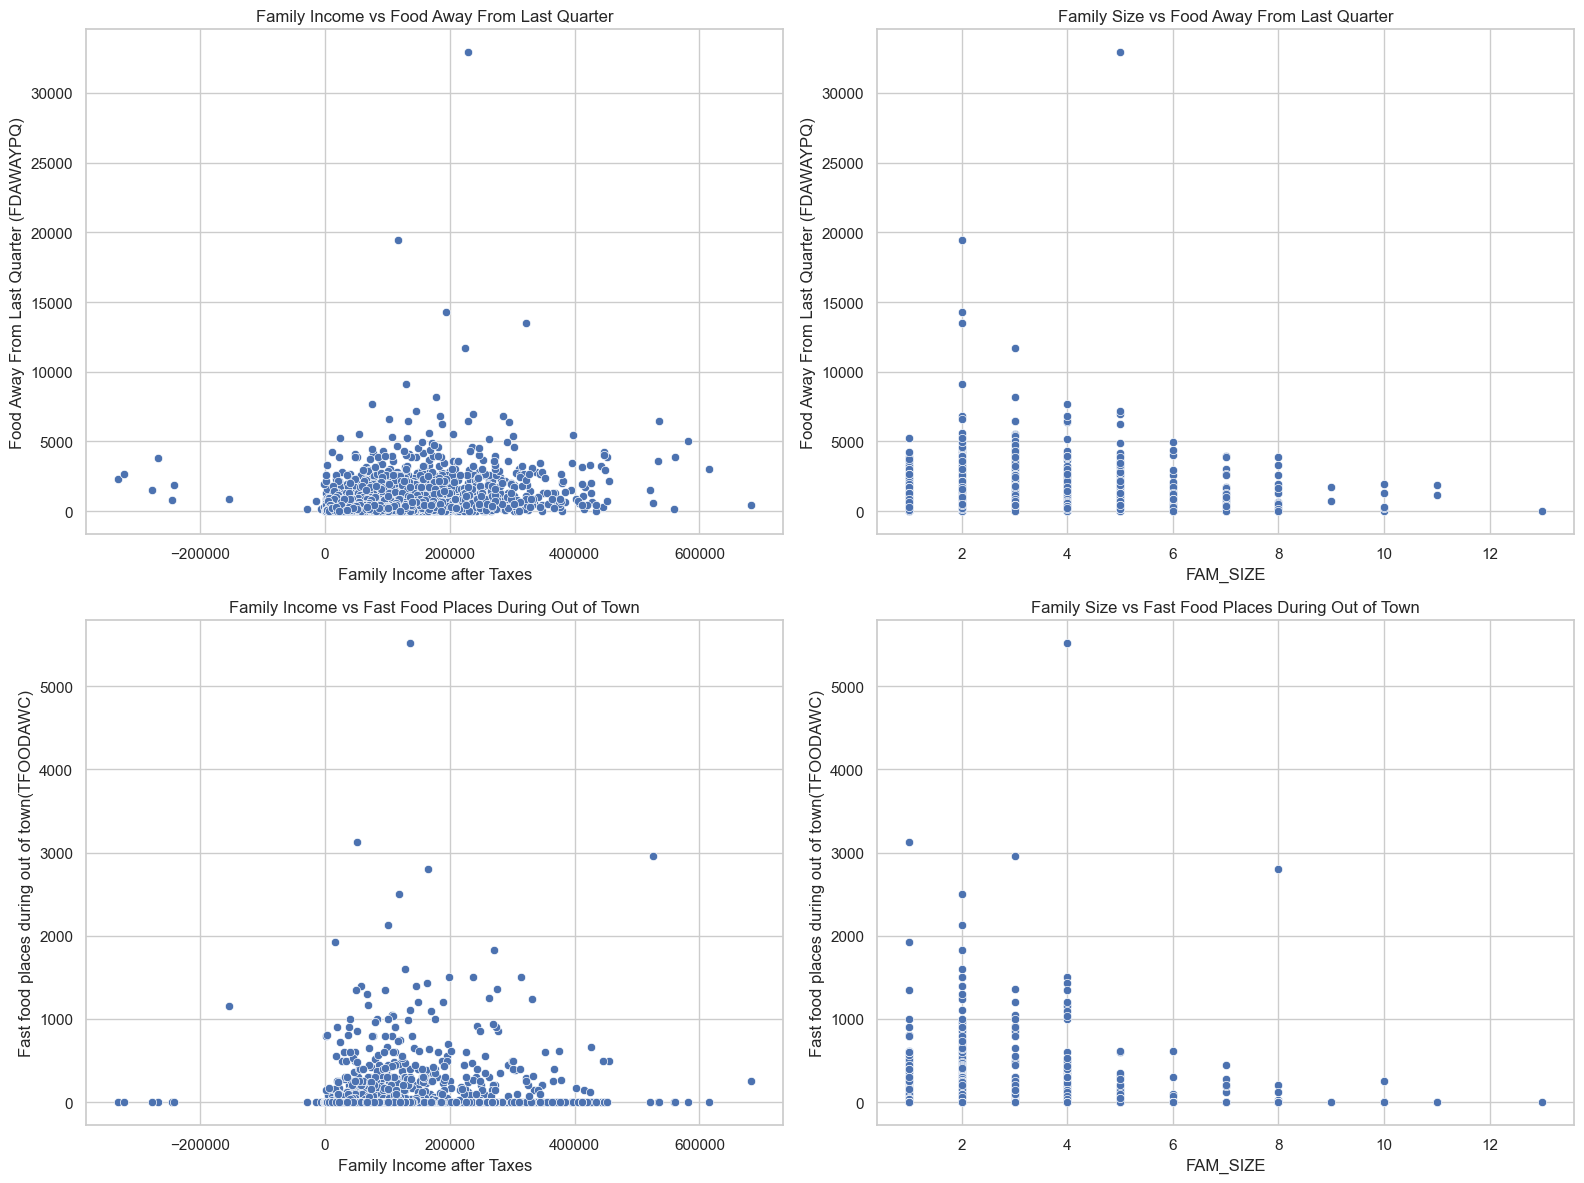

In [29]:
# 1. 'Family Income after Taxes' vs 'Food Away From Last Quarter (FDAWAYPQ)'
# 2. 'FAM_SIZE' vs 'Food Away From Last Quarter (FDAWAYPQ)'
# 3. 'Family Income after Taxes' vs 'Fast food places during out of town(TFOODAWC)'
# 4. 'FAM_SIZE' vs 'Fast food places during out of town(TFOODAWC)'

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Family Income after Taxes vs Food Away From Last Quarter (FDAWAYPQ)
sns.scatterplot(data=df, x='Family Income after Taxes', y='Food Away From Last Quarter (FDAWAYPQ)', ax=axs[0, 0])
axs[0, 0].set_title('Family Income vs Food Away From Last Quarter')

# Plot 2: FAM_SIZE vs Food Away From Last Quarter (FDAWAYPQ)
sns.scatterplot(data=df, x='FAM_SIZE', y='Food Away From Last Quarter (FDAWAYPQ)', ax=axs[0, 1])
axs[0, 1].set_title('Family Size vs Food Away From Last Quarter')

# Plot 3: Family Income after Taxes vs Fast food places during out of town(TFOODAWC)
sns.scatterplot(data=df, x='Family Income after Taxes', y='Fast food places during out of town(TFOODAWC)', ax=axs[1, 0])
axs[1, 0].set_title('Family Income vs Fast Food Places During Out of Town')

# Plot 4: FAM_SIZE vs Fast food places during out of town(TFOODAWC)
sns.scatterplot(data=df, x='FAM_SIZE', y='Fast food places during out of town(TFOODAWC)', ax=axs[1, 1])
axs[1, 1].set_title('Family Size vs Fast Food Places During Out of Town')

plt.tight_layout()
plt.show()



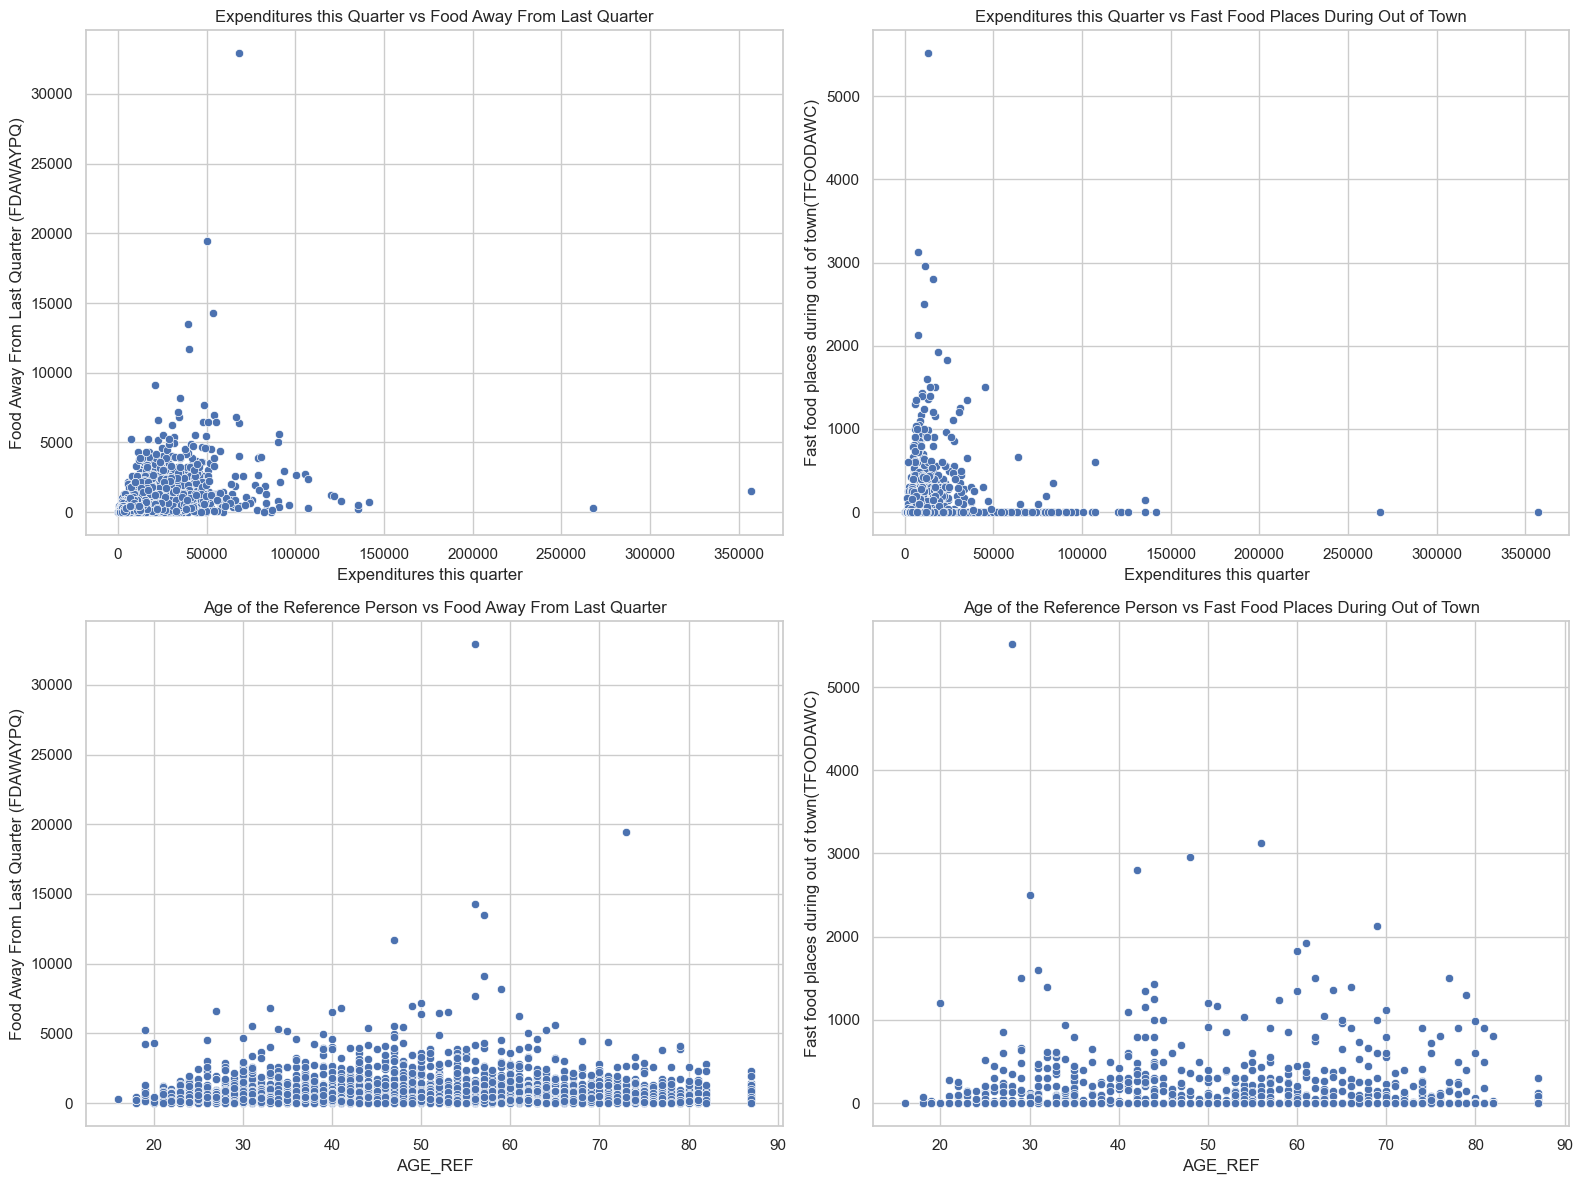

In [30]:
# 5. 'Expenditures this quarter' vs 'Food Away From Last Quarter (FDAWAYPQ)'
# 6. 'Expenditures this quarter' vs 'Fast food places during out of town(TFOODAWC)'
# 7. 'AGE_REF' (Age of the Reference Person) vs 'Food Away From Last Quarter (FDAWAYPQ)'
# 8. 'AGE_REF' vs 'Fast food places during out of town(TFOODAWC)'

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 5. Scatterplot for 'Expenditures this quarter' vs 'Food Away From Last Quarter (FDAWAYPQ)'
sns.scatterplot(data=df, x='Expenditures this quarter  ', y='Food Away From Last Quarter (FDAWAYPQ)', ax=axs[0, 0])
axs[0, 0].set_title('Expenditures this Quarter vs Food Away From Last Quarter')

# 6. Scatterplot for 'Expenditures this quarter' vs 'Fast food places during out of town(TFOODAWC)'
sns.scatterplot(data=df, x='Expenditures this quarter  ', y='Fast food places during out of town(TFOODAWC)', ax=axs[0, 1])
axs[0, 1].set_title('Expenditures this Quarter vs Fast Food Places During Out of Town')

# 7. Scatterplot for 'AGE_REF' vs 'Food Away From Last Quarter (FDAWAYPQ)'
sns.scatterplot(data=df, x='AGE_REF', y='Food Away From Last Quarter (FDAWAYPQ)', ax=axs[1, 0])
axs[1, 0].set_title('Age of the Reference Person vs Food Away From Last Quarter')

# 8. Scatterplot for 'AGE_REF' vs 'Fast food places during out of town(TFOODAWC)'
sns.scatterplot(data=df, x='AGE_REF', y='Fast food places during out of town(TFOODAWC)', ax=axs[1, 1])
axs[1, 1].set_title('Age of the Reference Person vs Fast Food Places During Out of Town')

plt.tight_layout()
plt.show()


# 7. Correlation Matrix

In [31]:
# Generating a correlation matrix as a DataFrame
corr_matrix = df.corr()
corr_matrix

,NEWID,AGE_REF,FAM_SIZE,STATE CODE,No of Income Earners,Family Income after Taxes,Family Income Before Taxes,Expenditures this quarter,Food at home this quarter,Hours worked by spouse per week,Total Amount spent(outlays major),MARRIED,NEVER MARRIED,MARRIED WITH CHILDREN,DIVORCED,SEPERATED,Food Away From Last Quarter (FDAWAYPQ),Fast food places during out of town(TFOODAWC)
NEWID,1.000000,-0.026318,-0.002305,-0.005448,0.002241,-0.014926,-0.024522,-0.018343,-0.057578,-0.031266,-0.029173,-0.010514,0.008032,-0.010063,0.015087,0.016636,-0.009352,0.019605
AGE_REF,-0.026318,1.000000,-0.278168,-0.011340,-0.432865,-0.153219,-0.139464,-0.049923,-0.075882,-0.096626,-0.041641,-0.014691,-0.398526,0.378508,0.166956,-0.016360,-0.101274,-0.034397
FAM_SIZE,-0.002305,-0.278168,1.000000,0.000725,0.600729,0.392324,0.259059,0.190965,0.386404,0.048100,0.220575,0.480969,-0.228791,-0.217658,-0.206756,-0.026497,0.158357,0.037310
STATE CODE,-0.005448,-0.011340,0.000725,1.000000,-0.015051,-0.039138,-0.020935,-0.017875,-0.047399,-0.011406,-0.028642,-0.002473,-0.024803,0.000325,0.028641,0.007949,-0.034587,-0.026740
No of Income Earners,0.002241,-0.432865,0.600729,-0.015051,1.000000,0.526638,0.387098,0.243017,0.283603,0.000542,0.268065,0.348039,-0.057247,-0.268811,-0.174280,-0.032270,0.213127,0.070722
Family Income after Taxes,-0.014926,-0.153219,0.392324,-0.039138,0.526638,1.000000,0.852331,0.463478,0.308972,0.156601,0.515509,0.409715,-0.177631,-0.194561,-0.174299,-0.059775,0.329005,0.134500
Family Income Before Taxes,-0.024522,-0.139464,0.259059,-0.020935,0.387098,0.852331,1.000000,0.419274,0.245082,0.147244,0.476905,0.321226,-0.138106,-0.160562,-0.125490,-0.057724,0.320808,0.126632
Expenditures this quarter,-0.018343,-0.049923,0.190965,-0.017875,0.243017,0.463478,0.419274,1.000000,0.431723,0.034698,0.918367,0.229931,-0.113819,-0.100805,-0.090476,-0.023556,0.409663,0.018483
Food at home this quarter,-0.057578,-0.075882,0.386404,-0.047399,0.283603,0.308972,0.245082,0.431723,1.000000,0.022187,0.476191,0.269711,-0.132410,-0.123983,-0.108072,-0.016716,0.306258,-0.048402
Hours worked by spouse per week,-0.031266,-0.096626,0.048100,-0.011406,0.000542,0.156601,0.147244,0.034698,0.022187,1.000000,0.033868,-0.026198,0.018386,0.000034,NaN,NaN,0.019519,0.002323


### Correlation Matrix Heatmap

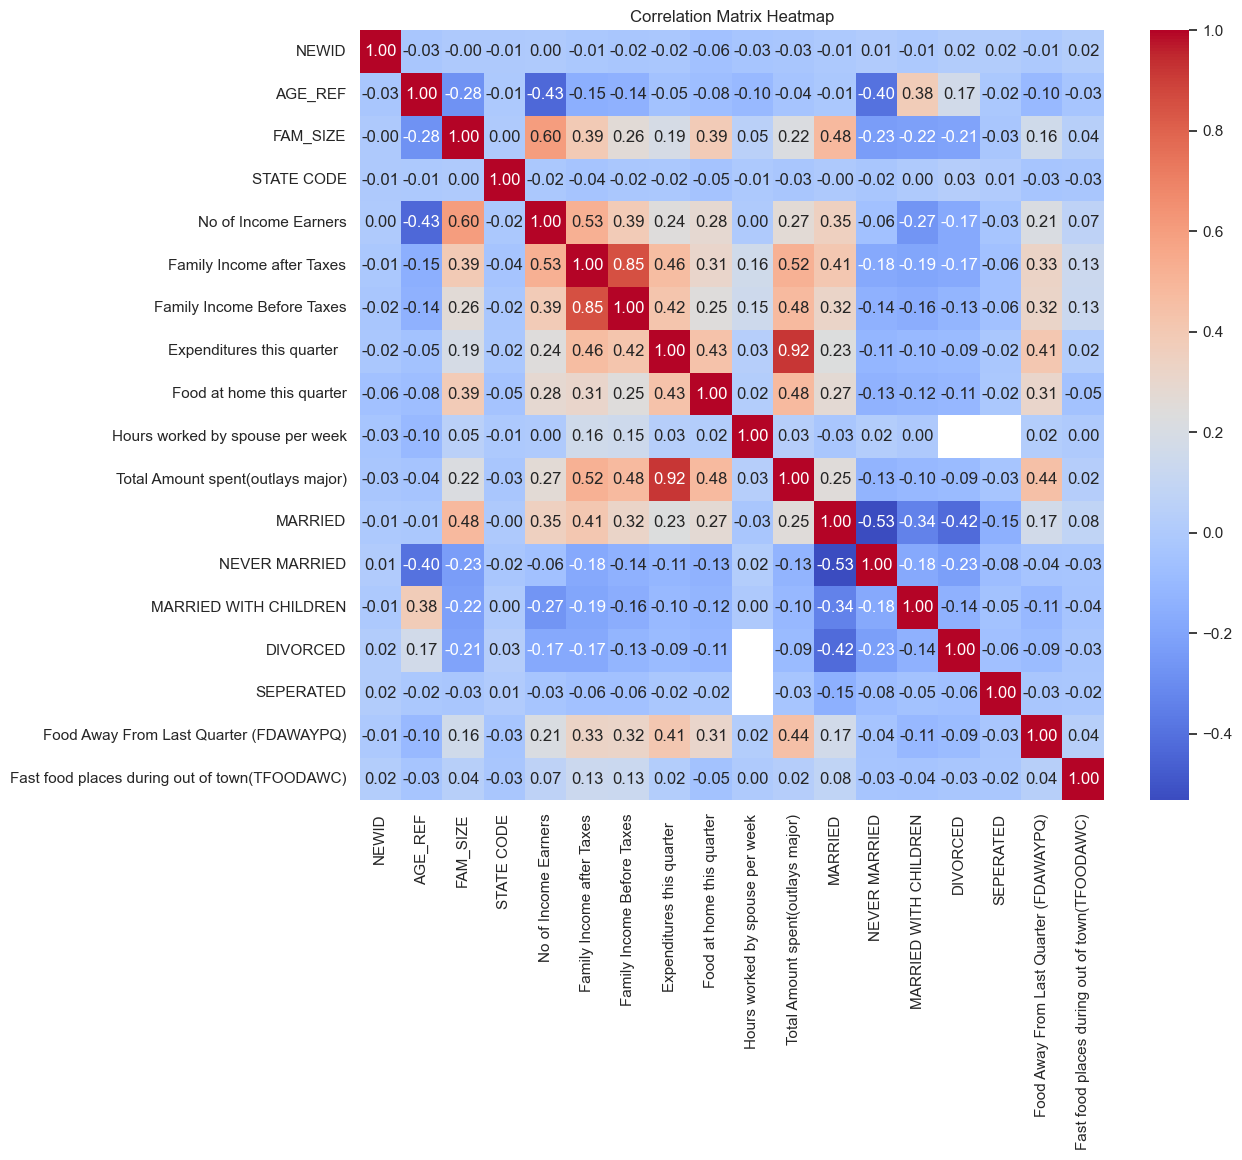

In [32]:
# Correlation Matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


### Top and Least correlated variables 

In [33]:
# Flatten the correlation matrix to pair variables and their correlation coefficient
corr_pairs = corr_matrix.unstack()

# Sort the pairs to identify strongest and weakest correlations
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

# Filtering out self-correlations (correlation of a variable with itself)
filtered_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) != sorted_pairs.index.get_level_values(1)]

# Identifying the top 3 strongest positive correlations
top3_positive = filtered_pairs[filtered_pairs > 0].tail(3)

# Identifying the top 3 strongest negative correlations
top3_negative = filtered_pairs[filtered_pairs < 0].head(3)

# Identifying the least 3 positive correlations (excluding zeros)
least3_positive = filtered_pairs[(filtered_pairs > 0) & (filtered_pairs < 1)].head(3)

# Identifying the least 3 negative correlations
least3_negative = filtered_pairs[filtered_pairs < 0].tail(3)

print("top 3 positively correlated variables ")
print(top3_positive)
print("\n")
print("top 3 negative correlated variables")
print(top3_negative)
print("\n")
print("least 3 positive correlated variables ")
print(least3_positive)
print("\n")
print("least 3 negative correlated variables")
print(least3_negative)


top 3 positively correlated variables 
Family Income Before Taxes         Family Income after Taxes            0.852331
Total Amount spent(outlays major)  Expenditures this quarter            0.918367
Expenditures this quarter          Total Amount spent(outlays major)    0.918367
dtype: float64


top 3 negative correlated variables
NEVER MARRIED         MARRIED         -0.532831
MARRIED               NEVER MARRIED   -0.532831
No of Income Earners  AGE_REF         -0.432865
dtype: float64


least 3 positive correlated variables 
Hours worked by spouse per week  MARRIED WITH CHILDREN              0.000034
MARRIED WITH CHILDREN            Hours worked by spouse per week    0.000034
                                 STATE CODE                         0.000325
dtype: float64


least 3 negative correlated variables
MARRIED   STATE CODE   -0.002473
NEWID     FAM_SIZE     -0.002305
FAM_SIZE  NEWID        -0.002305
dtype: float64
